<a href="https://colab.research.google.com/github/prasadshedge/LEARNBAY-DATA-SCIENCE-/blob/main/KMeans_Clustering_Implementation_Customer_Spend_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering

## Import Libraries & DataSets

In [ ]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline 
import numpy as np  

In [ ]:
customer_data = pd.read_csv('C:/Users/aksin52/Documents/Learnbay Stats ML Curriculum/Cust_Spend_Data.csv')

In [ ]:
customer_data.shape  

(10, 7)

In [ ]:
customer_data.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [ ]:
customer_data.dtypes

Cust_ID             int64
Name               object
Avg_Mthly_Spend     int64
No_Of_Visits        int64
Apparel_Items       int64
FnV_Items           int64
Staples_Items       int64
dtype: object

In [ ]:
features=['Avg_Mthly_Spend','No_Of_Visits','Apparel_Items','FnV_Items','Staples_Items']
X=customer_data[features]

# Feature Scaling for Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
stdsc=StandardScaler()
X_data=pd.DataFrame(stdsc.fit_transform(X),index=X.index,columns=X.columns).add_suffix('_std')

In [ ]:
X_data.describe()

,Avg_Mthly_Spend_std,No_Of_Visits_std,Apparel_Items_std,FnV_Items_std,Staples_Items_std
count,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
mean,0.000000,2.220446e-17,-6.661338e-17,4.440892e-17,0.000000
std,1.054093,1.054093e+00,1.054093e+00,1.054093e+00,1.054093
min,-1.410294,-1.240347e+00,-6.546537e-01,-7.414326e-01,-1.380131
25%,-0.860829,-6.201737e-01,-6.546537e-01,-7.414326e-01,-0.690066
50%,0.054947,-3.100868e-01,-6.546537e-01,-6.290944e-01,-0.172516
75%,0.741778,6.201737e-01,9.819805e-01,8.874724e-01,0.776324
max,1.886498,1.860521e+00,1.527525e+00,1.730009e+00,1.725164


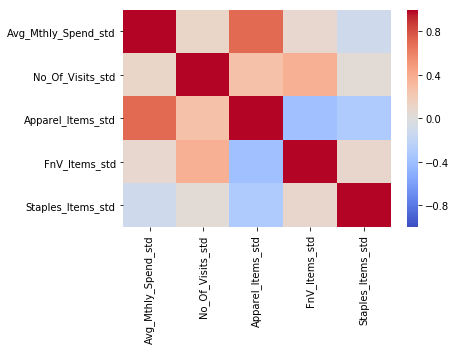

In [ ]:
import seaborn as sns
sns.heatmap(X_data.corr(),vmin=-1,vmax=1,center=0,cmap='coolwarm')

In [ ]:
X_data2=X_data.drop(['Avg_Mthly_Spend_std','No_Of_Visits_std'],axis=1)

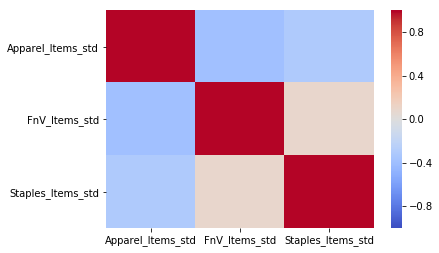

In [ ]:
import seaborn as sns
sns.heatmap(X_data2.corr(),vmin=-1,vmax=1,center=0,cmap='coolwarm')

# K-Means Clustering

## WCSS Plot or Elbow Curve for Optimal cluster identification

In [ ]:
# WCSS stands for Within Cluster Sum of Squares

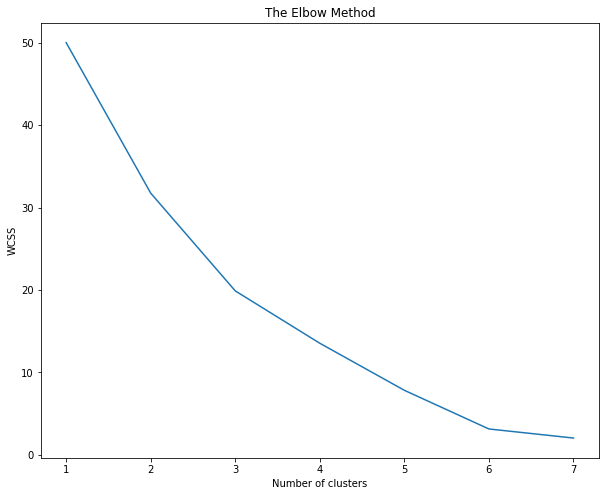

In [ ]:
# find the appropriate cluster number
plt.figure(figsize=(10, 8))
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means Clustering & Cluster Information

In [ ]:
# Fitting K-Means to the dataset
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_data)
X['Cluster_label_3_clus'] = pd.DataFrame(y_kmeans)

In [ ]:
X['Cluster_label_3_clus'].value_counts()

0    7
1    3
Name: Cluster_label_3_clus, dtype: int64

In [ ]:
X.groupby('Cluster_label_3_clus').agg(['mean'])

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items,Cluster_label,Cluster_label_4_clus
,mean,mean,mean,mean,mean,mean,mean
Cluster_label_3_clus,,,,,,,
0,3571.428571,3.714286,0,5.428571,4.571429,0.857143,0.857143
1,7833.333333,4.666667,1,1.666667,2.666667,1.000000,1.000000


# Plotting Clusters with Swarmplot

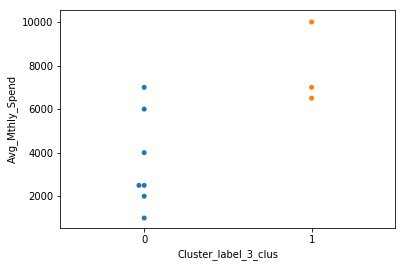

In [ ]:
import seaborn as sns
ax=sns.swarmplot(x="Cluster_label_3_clus",y="Avg_Mthly_Spend",data=X)

In [ ]:
from sklearn.metrics import silhouette_score
cluster_label=X['Cluster_label_3_clus']
silhouette_avg = silhouette_score(X, cluster_label)
silhouette_avg

0.31094218617878916

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X,cluster_label)

0.7603124130763018

Business Scenario: Say there are 5 marketing offers that needs to be mapped to individual customers. The business wants you to 
    do a quick analysis to figure out which offer should be given to which customer.
Potential Solution: Perform PCA and then build clusters on the Components or Build clusters on the given data after scaling. 
When you profile the clusters, the behaviors are likely to different across clusters. Based on the behavior, you can decide 
which offer should be given to which group.

Scenario 2: Suppose the business wants to understand, what are the drivers of decline of customer engagement
Assuming that there is a metric to define customer engagement, you can use this metric to build customer clusters. 
Then build individual Random Forests/LR etc models for each cluster to see which variables are affecting that group.

    

In [ ]:
# Cluster 3 is largely composed of premium customers who would shop for all items (Premium Engaged Group)
# Cluster 1 is composed of everyday shoppers (Staple Engaged)
# Cluster 2 is composed of engaged customers from an FnV Perspective ()